In [1]:
import pandas as pd
df=pd.DataFrame()
for c in pd.read_csv("Kaagle_Upload.csv",chunksize=10000):
    df=df.append(c)
df    
df1=df.copy()
df2=df1.columns[:14]
df3=df1[14:28]
df2=df.copy()
df2["age_of_casualty"]=df2["age_of_casualty"].fillna(df2["age_of_casualty"].median()) 
df2["age_of_driver"]=df2["age_of_driver"].fillna(df2["age_of_driver"].median())
df5=df2[:174538][['age_of_casualty','age_band_of_casualty','age_band_of_driver','age_of_driver','vehicle_manoeuvre','skidding_and_overturning','hit_object_in_carriageway','hit_object_off_carriageway','weather_conditions','light_conditions','road_surface_conditions','special_conditions_at_site'
         ,'urban_or_rural_area']]
df2["age_of_casualty"]=df2["age_of_casualty"].fillna(df2["age_of_casualty"].median()) 
for i in df2["age_of_casualty"]:
    if i==-1:
        df2["age_of_casualty"]=df2["age_of_casualty"].replace(i,df2["age_of_casualty"].median())
df2["age_band_of_casualty"]=df2["age_band_of_casualty"].fillna(df2["age_band_of_casualty"].median())
for j in df2["age_band_of_casualty"]:
    if j==-1:
        df2["age_band_of_casualty"]=df2["age_band_of_casualty"].replace(j,df2["age_band_of_casualty"].median())

C:\Users\bharg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df2["age_band_of_driver"]=df2["age_band_of_driver"].fillna(df2["age_band_of_driver"].median()) 
for k in df2["age_band_of_driver"]:
    if k==-1:
        df2["age_band_of_driver"]=df2["age_band_of_driver"].replace(k,df2["age_band_of_driver"].median())
df2["age_of_driver"]=df2["age_of_driver"].fillna(df2["age_of_driver"].median())
for l in df2["age_of_driver"]:
    if l==-1:
        df2["age_of_driver"]=df2["age_of_driver"].replace(l,df2["age_of_driver"].median())
df5=df2[:174538][['age_of_casualty','age_band_of_casualty','age_band_of_driver','age_of_driver','vehicle_manoeuvre','skidding_and_overturning','hit_object_in_carriageway','hit_object_off_carriageway','weather_conditions','light_conditions','road_surface_conditions','special_conditions_at_site'
         ,'urban_or_rural_area']]
import sklearn
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
y=df5['age_of_casualty'][:10000]
lis=[]
for i in y:
    if i<20:
        lis.append(0)
    elif i>=20 and i<40:
        lis.append(1)
    elif i>=40 and i<60:
        lis.append(2)
    elif i>=60 and i<80:
        lis.append(3)
    else:
        lis.append(4)
        
X=df5[['skidding_and_overturning','hit_object_in_carriageway','hit_object_off_carriageway','road_surface_conditions','urban_or_rural_area']][:10000]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, lis, test_size=0.45, random_state=0)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
classif=OneVsRestClassifier(SVC(probability=True))
classif.fit(X_train,y_train)


C:\Users\bharg\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array
C:\Users\bharg\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bharg\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bharg\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarn

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          n_jobs=None)

In [3]:
pred=classif.predict(X_test)
s=0
for i in range(len(pred)):
    if pred[i]==y_test[i]:
        s+=1

In [4]:
print("accuracy of model1",s/len(pred)*100,"percent")

accuracy of model1 67.95555555555556 percent


In [5]:
print("the performance of the trained model is",classif.score(X_train,y_train)*100,"percent")

the performance of the trained model is 68.4363636364 percent


In [6]:
print("the performance of the test model is",classif.score(X_test,y_test)*100,"percent")

the performance of the test model is 67.9555555556 percent


In [7]:
import sklearn
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
y1=df5['age_of_driver'][:10000]
lis1=[]
for i in y1:
    if i<20:
        lis1.append(0)
    elif i>=20 and i<40:
        lis1.append(1)
    elif i>=40 and i<60:
        lis1.append(2)
    elif i>=60 and i<80:
        lis1.append(3)
    else:
        lis1.append(4)
        
X1=df5[['skidding_and_overturning','hit_object_in_carriageway','hit_object_off_carriageway','road_surface_conditions','urban_or_rural_area']][:10000]
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, lis1, test_size=0.4, random_state=0)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
classif1=OneVsRestClassifier(SVC(probability=True))
classif1.fit(X_train1,y_train1)



C:\Users\bharg\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bharg\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bharg\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bharg\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          n_jobs=None)

In [8]:
print("the performance of trained model2 is",classif1.score(X_train1,y_train1)*100,"percent")
print("the performance of test model2 is",classif1.score(X_test1,y_test1)*100,"percent")

the performance of trained model2 is 58.55 percent
the performance of test model2 is 57.825 percent


In [9]:
pred1=classif1.predict(X_test1)
s1=0
for i in range(len(pred1)):
    if pred1[i]==y_test1[i]:
        s1+=1
print("accuracy of model2",s1/len(pred1)*100,"percent")
import seaborn as sns

accuracy of model2 57.825 percent


In [10]:
dat=pd.merge(X,pd.DataFrame(pred,columns=["casualty"]),right_index=True,left_index=True)
data=pd.merge(dat,pd.DataFrame(pred1,columns=["driver"]),right_index=True,left_index=True)

In [11]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
imp=clf.feature_importances_

In [13]:
print("the importance of the features are",imp)

the importance of the features are [ 0.19604894  0.24533437  0.33380194  0.14642689  0.07838785]


([<matplotlib.axis.XTick at 0x14fb7da41d0>,
 <a list of 5 Text xticklabel objects>)

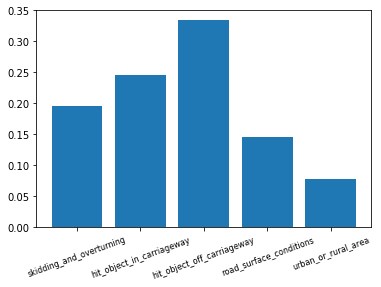

In [14]:
import matplotlib.pyplot as plt
feat=list(X.columns)
%matplotlib inline
plt.bar(feat,imp)
plt.xticks(feat,rotation=20,fontsize=8)

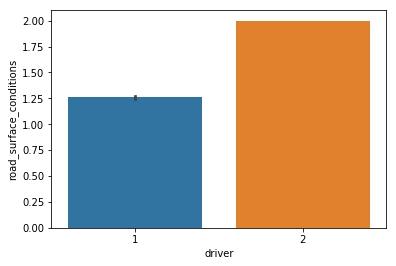

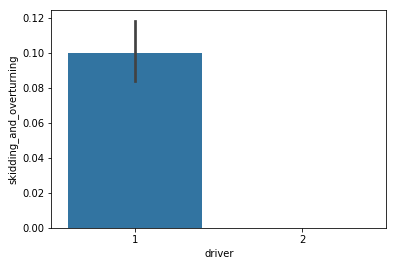

In [52]:
plt.subplots(0,0,sharex='row')
sns.barplot(x=data['driver'],y=data['road_surface_conditions'])
plt.subplots(1,1,sharex='row')
sns.barplot(x=data['driver'],y=data['skidding_and_overturning'])

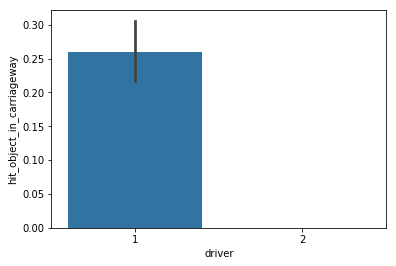

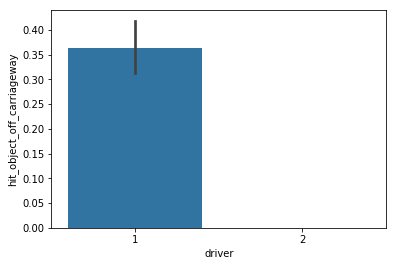

In [53]:
plt.subplots(0,0,sharex='row')
sns.barplot(x=data['driver'],y=data['hit_object_in_carriageway'])
plt.subplots(1,1,sharex='row')
sns.barplot(x=data['driver'],y=data['hit_object_off_carriageway'])

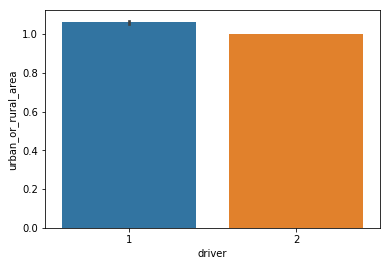

In [54]:
sns.barplot(x=data['driver'],y=data['urban_or_rural_area'])

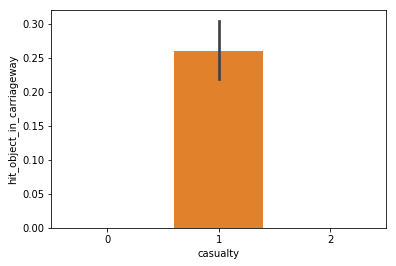

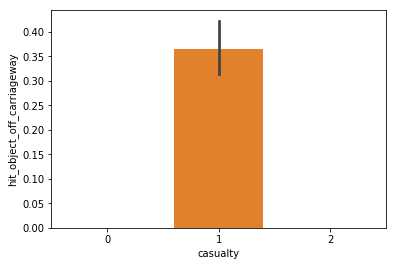

In [55]:
plt.subplots(0,0,sharex='row')
sns.barplot(x=data['casualty'],y=data['hit_object_in_carriageway'])
plt.subplots(1,1,sharex='row')
sns.barplot(x=data['casualty'],y=data['hit_object_off_carriageway'])

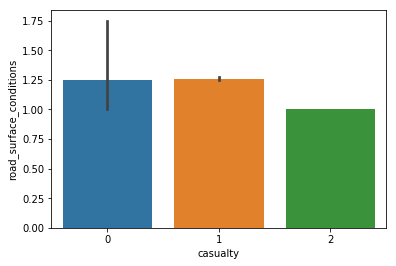

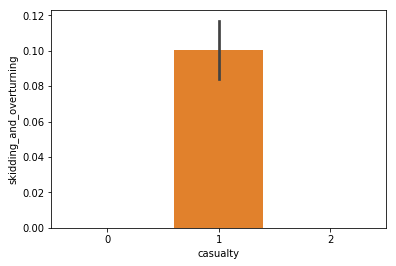

In [56]:
plt.subplots(0,0,sharex='row')
sns.barplot(x=data['casualty'],y=data['road_surface_conditions'])
plt.subplots(1,1,sharex='row')
sns.barplot(x=data['casualty'],y=data['skidding_and_overturning'])

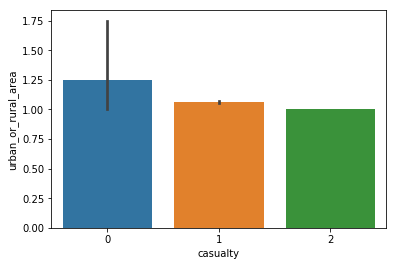

In [57]:
sns.barplot(x=data['casualty'],y=data['urban_or_rural_area'])